# 4.8 BOFdat
Adapt the biomass objective function using BOFdat, based on experimental data of EcN and K12. 

- https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006971
- https://bofdat.readthedocs.io/en/latest/
- https://github.com/jclachance/BOFdat

<font color='red'> !!! Run notebook in python 2.7 environment (bofdat.yml) !!! </font>

In [2]:
from BOFdat import step1
from BOFdat import step2
from BOFdat import step3
from BOFdat.util import update

import cobra
import pandas as pd
import numpy as np

# Step 1. Macromolecular composition
The general macromolecular composition for Escherichia coli (E.coli K12 MG1655) is used.
- https://github.com/jclachance/BOFdat

In [2]:
#Set parameters based on dry weight composition
dna_weight_fraction = 0.031
rna_weight_fraction = 0.205
protein_weight_fraction = 0.55
lipid_weight_fraction = 0.1
metabolite_weight_fraction = 0.1

### DNA
The EcN genome is available on NCBI
- https://www.ncbi.nlm.nih.gov/assembly/GCF_003546975.1

In [3]:
#Give the path to each file as function parameters
#Genome file in BioPython supported format (.faa, .fna) and GenBank file
#also in BioPython supported format (.gb, .gbff)
genome = '../data/genomes_gb/CP022686.1.fna'
genbank = '../data/genomes_gb/CP022686.1.gb'

### Transcriptomics
Transcriptomics data of EcN from the study by Zhao et al. 20220 was used

- https://www.sciencedirect.com/science/article/pii/S2667370322000030?via%3Dihub

In [4]:
#Omic datasets as a 2 column csv file, gene and abundance
transcriptomic = '../tables/EcN_transcriptomics.csv'

### Proteomics
Proteomic data of E.coli K12 MG1655 was used, as no data was available for EcN.
- https://github.com/jclachance/BOFdat

Gene IDs in the proteomic data needs to be converted to EcN IDs.
Construction of the converted df only needed first time.

In [5]:
# #import packages needed
# from glob import glob
# from Bio import Entrez, SeqIO

In [6]:
# ### Get all gene annotations from MG1655

# in_file = '../tables/Ecoli_K12_MG1655.gbff'

# gene_annot_df = pd.DataFrame(columns=('locus', 'ncbigene', 'ncbiprotein'))
# gene_annot_df.set_index('locus', inplace=True)

# handle = open(in_file)

# records = SeqIO.parse(handle, "genbank")
# for record in records:
#     for f in record.features:
#         if f.type=='CDS':

#             # Get locus tag
#             if 'locus_tag' in f.qualifiers.keys():
#                 locus = f.qualifiers['locus_tag'][0]
            
# #             # get gene id
#             if 'gene' in f.qualifiers.keys():
#                 gene_id = f.qualifiers['gene'][0]
#                 gene_annot_df.loc[locus, 'ncbigene'] = gene_id
            
#             # get protein_id
#             if 'protein_id' in f.qualifiers.keys():
#                 prot_id = f.qualifiers['protein_id'][0]
#                 gene_annot_df.loc[locus, 'ncbiprotein'] = prot_id

# gene_annot_df.head()

In [7]:
# ### Get all gene annotations from EcN

# in_file = '../data/genomes_gb/CP022686.1.gb'

# EcN_annot_df = pd.DataFrame(columns=('locus', 'ncbigene', 'ncbiprotein'))
# EcN_annot_df.set_index('locus', inplace=True)

# handle = open(in_file)

# records = SeqIO.parse(handle, "genbank")
# for record in records:
#     for f in record.features:
#         if f.type=='CDS':

#             # Get locus tag
#             if 'locus_tag' in f.qualifiers.keys():
#                 locus = f.qualifiers['locus_tag'][0]
            
# #             # get gene id
#             if 'gene' in f.qualifiers.keys():
#                 gene_id = f.qualifiers['gene'][0]
#                 EcN_annot_df.loc[locus, 'ncbigene'] = gene_id
            
#             # get protein_id
#             if 'protein_id' in f.qualifiers.keys():
#                 prot_id = f.qualifiers['protein_id'][0]
#                 EcN_annot_df.loc[locus, 'ncbiprotein'] = prot_id

# EcN_annot_df.head()

In [8]:
# # Open proteomics data iML1515
# proteomic_df = pd.read_csv('../tables/proteomic.csv')
# proteomic_df

# # Reset index gene_annot_df
# gene_annot_df = gene_annot_df.reset_index().set_index('ncbiprotein')

# # Merge dataframes
# MG1655_df = pd.merge(proteomic_df, gene_annot_df, left_on='gene_id', right_index=True)

# # Convert to EcN gene IDs
# conv_df = pd.read_csv('../tables/MG_geneIDs_matrix.csv', names=['MG1655', 'EcN'])
# gene_conv_df = pd.merge(MG1655_df, conv_df, left_on='locus', right_on='MG1655')

# # Create a df with EcN protein ID and abundance
# EcN_proteomic_df = pd.merge(gene_conv_df, EcN_annot_df, left_on='EcN', right_index=True)
# EcN_proteomic_df.set_index('ncbiprotein', inplace=True)
# EcN_proteomic_df.drop(columns=['gene_id', 'locus', 'ncbigene_x', 'MG1655', 'EcN', 'ncbigene_y'], inplace=True)
# EcN_proteomic_df

In [9]:
# # Save as .csv file
# EcN_proteomic_df.to_csv('../tables/EcN_proteomics.csv')

In [10]:
proteomic = '../tables/EcN_proteomics.csv'

### Lipids
Lipidomic data of E.coli K12 MG1655 was used, as no data was available for EcN.
- https://github.com/jclachance/BOFdat

In [11]:
#Lipidomic abundances and conversion to model identifier
lipidomic_abundances = '../tables/lipidomic_abundances.csv'
lipidomic_conversion = '../tables/lipidomic_conversion.csv'

## 1.1 Maintenance
Maintenance data of E.coli K12 MG1655 was used, as limited data was available for EcN.
- https://github.com/jclachance/BOFdat

Add the growth data from Revelles paper (glucose/gluconate)
- https://doi.org/10.1371/journal.pone.0066386

In [19]:
#Growth data on different carbon sources, uptake and secretion rates
# maintenance = '../tables/maintenance.csv'
maintenance = '../tables/maintenance_ecn.csv'

### EcN model

In [13]:
# Load EcN model
model = '../data/models/CP022686.1_cur_4.7.json'

## 1.2 Macromolecules

In [14]:
dna_coefficients = step1.generate_dna_coefficients(genome,model,DNA_WEIGHT_FRACTION=dna_weight_fraction)
dna_coefficients

{<Metabolite dttp_c at 0x115b68d0>: -0.025264995594222028,
 <Metabolite dctp_c at 0x115c0240>: -0.027205885733218617,
 <Metabolite datp_c at 0x115d46a0>: -0.024535580087683178,
 <Metabolite ppi_c at 0x115d4780>: 0.10089456005683937,
 <Metabolite dgtp_c at 0x116d4f28>: -0.02388809864171554}

In [15]:
rna_coefficients = step1.generate_rna_coefficients(genbank,model,transcriptomic,RNA_WEIGHT_FRACTION=rna_weight_fraction)
rna_coefficients

C:\Users\maxvan\Anaconda3\envs\bofdat\lib\site-packages\BOFdat\core\rna.py:60 UserWarning: Some identifiers not found in provided annotation


{<Metabolite ctp_c at 0x1500b550>: -0.16705693200583052,
 <Metabolite atp_c at 0x1503f860>: -0.15682670811169883,
 <Metabolite utp_c at 0x1505f780>: -0.15393794867659485,
 <Metabolite ppi_c at 0x15069748>: 0.6397639025268087,
 <Metabolite gtp_c at 0x150d1c50>: -0.16194231373268453}

In [16]:
protein_coefficients = step1.generate_protein_coefficients(genbank,model,proteomic,PROTEIN_WEIGHT_FRACTION=protein_weight_fraction)
protein_coefficients

C:\Users\maxvan\Anaconda3\envs\bofdat\lib\site-packages\BOFdat\core\protein.py:64 UserWarning: Redundancy in dataset identifiers


{<Metabolite his__L_c at 0x19fb1cc0>: -0.0784666222129269,
 <Metabolite val__L_c at 0x19fc6208>: -0.4236326541330141,
 <Metabolite pro__L_c at 0x19fc6240>: -0.23785545643823697,
 <Metabolite asn__L_c at 0x19fda278>: -0.1988011065795899,
 <Metabolite leu__L_c at 0x19fda4e0>: -0.43210232676094734,
 <Metabolite met__L_c at 0x1a19a898>: -0.10251662872662275,
 <Metabolite tyr__L_c at 0x1a1a4e48>: -0.09992310063926794,
 <Metabolite cys__L_c at 0x1a1a4eb8>: -0.046655642921015865,
 <Metabolite trp__L_c at 0x1a1ae940>: -0.030522659777398792,
 <Metabolite lys__L_c at 0x1a1aea90>: -0.25290101506014606,
 <Metabolite glu__L_c at 0x1a219da0>: -0.2831016692802292,
 <Metabolite ile__L_c at 0x1a219f28>: -0.2916454170578126,
 <Metabolite gln__L_c at 0x1a224dd8>: -0.16515881771324858,
 <Metabolite ala__L_c at 0x1a2384e0>: -0.8051754272737,
 <Metabolite phe__L_c at 0x1a238630>: -0.12966182233807855,
 <Metabolite h2o_c at 0x1a242a20>: 5.470463534121725,
 <Metabolite gly_c at 0x1a242e48>: -0.825974589555013

In [17]:
lipid_coefficients = step1.generate_lipid_coefficients(lipidomic_abundances,lipidomic_conversion,model,LIPID_WEIGHT_FRACTION=lipid_weight_fraction)
lipid_coefficients

C:\Users\maxvan\Anaconda3\envs\bofdat\lib\site-packages\BOFdat\core\lipid.py:76 UserWarning: Redundancy in dataset identifiers


{<Metabolite pe160_p at 0x1d5033c8>: -0.05984233670391253,
 <Metabolite pg160_p at 0x1d503400>: -0.014826578855136979,
 <Metabolite pe181_p at 0x1d50df98>: -0.013250952451946145,
 <Metabolite pg181_p at 0x1d52c550>: -0.009098089940190764,
 <Metabolite pe161_p at 0x1d56ceb8>: -0.030710743257354293,
 <Metabolite pg161_p at 0x1d576358>: -0.013732749319021109}

## 1.3 Maintenance (GAM & NGAM)

cobra\util\solver.py:403 UserWarning: solver status is 'infeasible'


('m', 73.039820474777997, 'b', 13.948331959461735)
('R2=', 0.67931748410829607)


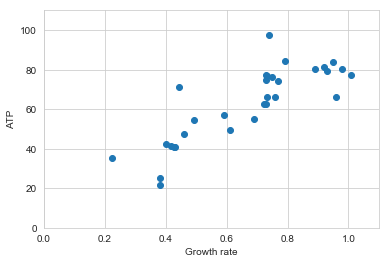

In [20]:
maintenance_cost = step1.generate_maintenance_costs(maintenance,model)

## 1.4 Update model

In [21]:
json_model = cobra.io.load_json_model(model)
bofdat_step1 = update.make_new_BOF(json_model,False,True,dna_coefficients,rna_coefficients,protein_coefficients,
                    lipid_coefficients,maintenance=maintenance_cost)

In [22]:
# Save
bofdat_step1.to_csv('../tables/bofdat_step1.csv')

# Step 2. Coenzymes & ions

## 2.1 Inorganic ions

The file BIOMASS_universal_components.csv needs to be added to the BOFdat folder
- https://github.com/jclachance/BOFdat

In [23]:
path_to_model = '../data/models/CP022686.1_cur_4.7.json'

In [24]:
# path_to_model = 'data/iML1515.json'
selected_metabolites = step2.find_coenzymes_and_ions(path_to_model)

Generating list of solvable metabolites


### Determine coefficients
The default weight_fraction of 0.05 (5%) is used 

In [25]:
from BOFdat.util.update import determine_coefficients
WEIGHT_FRACTION = 0.05
bd_step2 = determine_coefficients(selected_metabolites,json_model,WEIGHT_FRACTION)

### Update biomass

In [26]:
#Get the input from the previous step
path_to_biomass = '../tables/bofdat_step1.csv'
bd_step1 = update.convert_to_dictionary(path_to_biomass)
bd_step2.update(bd_step1)

# Save updated biomass
update.save_biomass(bd_step2,'../tables/bofdat_step2.csv')

C:\Users\maxvan\Anaconda3\envs\bofdat\lib\site-packages\BOFdat\util\update.py:22 UserWarning: File has 3 columns, assuming index on first column


In [27]:
# Remove u char
import json, ast
bd_step2_u = ast.literal_eval(json.dumps(bd_step2))

# Update biomass
update.save_biomass(bd_step2_u,'../tables/bofdat_step2.csv')

# Step 3. Finding specie-specific metabolic end goals

This step was skipped

# 4. Update BOF of EcN

### Load step 2

In [28]:
# # Load bd_steps
df_bd2 = pd.read_csv('../tables/bofdat_step2.csv', usecols=['Metabolites', 'Coefficients'])
df_bd2.set_index('Metabolites', inplace=True)

bd2 = {}

for mtb in df_bd2.index:
    bd2[mtb] = df_bd2.loc[mtb, 'Coefficients']

### Update model

In [29]:
# Load model
EcN_model = cobra.io.load_json_model('../data/models/CP022686.1_cur_4.7.json')

In [30]:
# EcN_model.reactions.BIOMASS_EcN_iHM1533_core_59p80M.reaction

In [31]:
for mtb in bd2:
    coef = bd2[mtb]
    
    # Remove metabolite from existing biomass reaction
    try:
        comp = EcN_model.reactions.BIOMASS_EcN_iHM1533_core_59p80M.get_coefficient(mtb)
        EcN_model.reactions.BIOMASS_EcN_iHM1533_core_59p80M.add_metabolites({mtb: -comp})
    except:
        print(mtb, 'not in BIOMASS')
        
# Add all metabolites from step 2
EcN_model.reactions.BIOMASS_EcN_iHM1533_core_59p80M.add_metabolites(bd2)

('pg161_p', 'not in BIOMASS')
('pe181_p', 'not in BIOMASS')
('na1_c', 'not in BIOMASS')
('pyr_c', 'not in BIOMASS')
('nadh_c', 'not in BIOMASS')
('amp_c', 'not in BIOMASS')
('pg181_p', 'not in BIOMASS')
('glyc3p_c', 'not in BIOMASS')
('nadph_c', 'not in BIOMASS')
('pg160_p', 'not in BIOMASS')


In [32]:
# EcN_model.reactions.BIOMASS_EcN_iHM1533_core_59p80M.reaction

In [33]:
# Remove iML1515 biomass reactions from EcN_model
EcN_model.remove_reactions(['BIOMASS_Ec_iML1515_core_75p37M', 'BIOMASS_Ec_iML1515_WT_75p37M'])

#### Update reaction list

In [3]:
# Load the rxn_origin dataframe and update biomass reactions
rxn_origin_df = pd.read_csv('../tables/rxn_origin.csv', usecols=['reaction', 'origin', 'added', 'notebook', 'notes'])
rxn_origin_df.set_index('reaction', inplace=True)

rxn_origin_df.loc['BIOMASS_Ec_iML1515_core_75p37M', 'added'] = 'removed'
rxn_origin_df.loc['BIOMASS_Ec_iML1515_core_75p37M', 'notes'] = 'Reaction was replaced by BIOMASS_EcN_iHM1533_core_59p80M in 4.8'

rxn_origin_df.loc['BIOMASS_Ec_iML1515_WT_75p37M', 'added'] = 'removed'
rxn_origin_df.loc['BIOMASS_Ec_iML1515_WT_75p37M', 'notes'] = 'Reaction was replaced by BIOMASS_EcN_iHM1533_core_59p80M in 4.8'

rxn_origin_df.loc['BIOMASS_EcN_iHM1533_core_59p80M', 'origin'] = 'New Reaction'
rxn_origin_df.loc['BIOMASS_EcN_iHM1533_core_59p80M', 'added'] = 'manual'
rxn_origin_df.loc['BIOMASS_EcN_iHM1533_core_59p80M', 'notebook'] = '4.8'
rxn_origin_df.loc['BIOMASS_EcN_iHM1533_core_59p80M', 'notes'] = 'Reaction added in 4.8. Replaces original iML1515 biomass objective functions'

# Save
rxn_origin_df.to_csv('../tables/rxn_origin.csv')

#### Save updated model

In [34]:
# Update model ID
EcN_model.id = 'iHM1533' #SBML only accepts "a string comprising only alphanumeric characters and underscores starting with either a letter or an underscore"

# Save the model
cobra.io.json.save_json_model(EcN_model, '../data/models/CP022686.1_cur_4.8.json')